In [1]:
import numpy as np
import fathon
from fathon import fathonUtils as fu



In [2]:
#time series
a = np.random.randn(10000)
b = np.random.randn(10000)

#zero-mean cumulative sum
a = fu.toAggregated(a)
b = fu.toAggregated(b)

#initialize mfdfa object
pymfdcca = fathon.MFDCCA(a, b)
#compute fluctuation function and generalized Hurst exponents
wins = fu.linRangeByStep(10, 2000)
n, F = pymfdcca.computeFlucVec(wins, np.arange(-3, 4, 0.1), revSeg=True, polOrd=1)
list_H, list_H_intercept = pymfdcca.fitFlucVec()

#compute mass exponents
tau = pymfdcca.computeMassExponents()

#compute multifractal spectrum
alpha, mfSpect = pymfdcca.computeMultifractalSpectrum()

In [3]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'f($\\alpha$)')

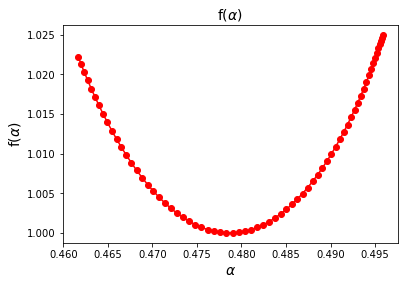

In [4]:
plt.plot(alpha, mfSpect, 'ro-')
plt.xlabel('$\\alpha$', fontsize=14)
plt.ylabel('f($\\alpha$)', fontsize=14)
plt.title('f($\\alpha$)', fontsize=14)

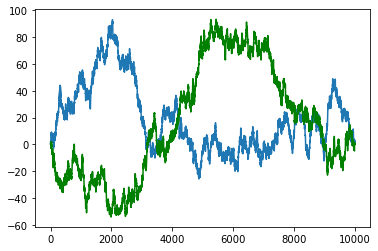

In [6]:
plt.plot(a)
plt.plot(b, color = 'green')

In [7]:
import numpy as np
from scipy.optimize import curve_fit

class MFDCCA:
    def __init__(self, series1, series2):
        self.series1 = np.array(series1)
        self.series2 = np.array(series2)

    def __F(self, series, scale):
        N = len(series)
        x = np.cumsum(series - np.mean(series))
        scale = np.int(scale)
        rms = np.zeros(N)
        for v in range(scale):
            yv = x[v:N:scale]
            nv = len(yv)
            c = list(range(nv))
            p = np.polyfit(c, yv, 1)
            fit = np.polyval(p, c)
            rms[v::scale] = yv - fit
        return rms

    def computeFluctuationFunction(self, scale):
        F1 = self.__F(self.series1, scale)
        F2 = self.__F(self.series2, scale)
        N = len(F1)
        return np.sqrt(np.mean((F1 - F2)**2, axis=0))

    def fitFluctuationFunction(self, scales):
        fluctuation_fn = np.array([self.computeFluctuationFunction(scale) for scale in scales])
        H, _ = curve_fit(lambda t, h: t**h, scales, fluctuation_fn, p0=[0.5])
        return H[0]

In [8]:
# Create an MFDCCA object
analysis = MFDCCA(a, b)

# Choose a set of scales
scales = np.logspace(0.1, 2, num=50)

# Compute the Hurst exponent
H = analysis.fitFluctuationFunction(scales)

# Print the result
print(H)

/home/ak/anaconda3/envs/timeSeries/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':


2.5796795437738664


In [9]:
import numpy as np
from scipy.optimize import curve_fit

class MFDCCA:
    def __init__(self, series1, series2):
        self.series1 = np.array(series1)
        self.series2 = np.array(series2)

    def __F(self, series, scale):
        N = len(series)
        x = np.cumsum(series - np.mean(series))
        scale = np.int(scale)
        rms = np.zeros(N)
        for v in range(scale):
            yv = x[v:N:scale]
            nv = len(yv)
            c = list(range(nv))
            p = np.polyfit(c, yv, 1)
            fit = np.polyval(p, c)
            rms[v::scale] = yv - fit
        return rms

    def computeFluctuationFunction(self, scale):
        F1 = self.__F(self.series1, scale)
        F2 = self.__F(self.series2, scale)
        N = len(F1)
        return np.sqrt(np.mean((F1 - F2)**2, axis=0))

    def computeGeneralizedHurstExponent(self, q, scales):
        fluctuation_fn = np.array([self.computeFluctuationFunction(scale) for scale in scales])
        fluctuation_fn_q = fluctuation_fn ** q
        return curve_fit(lambda t, hq: t**hq, scales, fluctuation_fn_q, p0=[0.5])[0][0]

In [10]:
# Assume we have two time series series1 and series2
series1 = np.random.rand(1000)
series2 = np.random.rand(1000)

# Create an MFDCCA object
analysis = MFDCCA(series1, series2)

# Choose a set of scales
scales = np.logspace(0.1, 2, num=50)

# Compute the generalized Hurst exponent for q=2
Hq = analysis.computeGeneralizedHurstExponent(q=2, scales=scales)

# Print the result
print(Hq)

0.6085890543995128


/home/ak/anaconda3/envs/timeSeries/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':
